In [1]:
import pandas as pd 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Database_C.csv')
df = df.iloc[:5000]
df

,code,error_check
0,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
1,"#include <stdio.h>\nint main(){\n int n,i,b...",0
2,#include <stdio.h>\n#include <stdlib.h>\n#incl...,0
3,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
4,#include <stdio.h>\n#include <stdlib.h>\nint m...,0
...,...,...
4995,#include <stdio.h>\nint a[100]={0};\nint n;\nv...,0
4996,#include <stdio.h>\nint main(){\n int a[1000...,0
4997,"#include <stdio.h>\nint main()\n{\n int h,n...",0
4998,"#include <stdio.h>\nint main()\n{\n int n,i...",0


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
one_hot_encoder = OneHotEncoder()

In [5]:
code_df = one_hot_encoder.fit_transform(df[['code']])

In [6]:
print(code_df.shape)

(5000, 5000)


In [7]:
code_df = code_df.todense()

In [8]:
code_df.shape

(5000, 5000)

In [9]:
from scipy.sparse import csr_matrix

In [10]:
code_df = csr_matrix(code_df)

In [11]:
code_df = code_df.tocsc()

In [12]:
code_df = pd.DataFrame.sparse.from_spmatrix(code_df)

In [13]:
processed_df = pd.concat([code_df,df[['error_check']]],axis=1)

In [14]:
scaler = StandardScaler(with_mean=False)

In [15]:
processed_df

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,error_check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
X = processed_df.iloc[:,:-1] # separates the errorcheck column last column

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

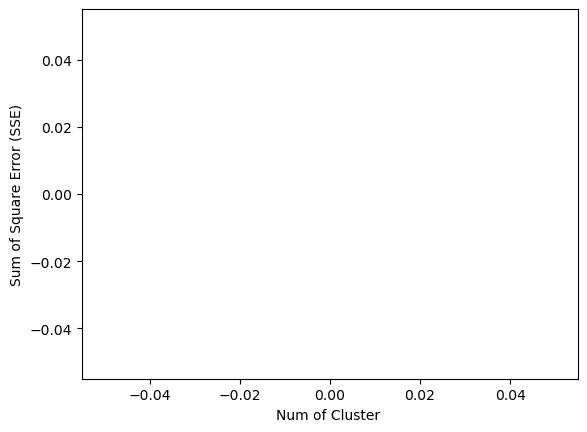

In [24]:
sse = []
clusters = 1
k_range = range(1,clusters)
for k in k_range :
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(k_range,sse)
plt.xlabel("Num of Cluster ")
plt.ylabel("Sum of Square Error (SSE)")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)
predictions = kmeans.fit_predict(X_scaled)

In [26]:
df["cluster"] = predictions

In [27]:
df.head()

,code,error_check,cluster
0,#include <stdio.h>\n#include <stdlib.h>\nint m...,0,0
1,"#include <stdio.h>\nint main(){\n int n,i,b...",0,0
2,#include <stdio.h>\n#include <stdlib.h>\n#incl...,0,0
3,#include <stdio.h>\n#include <stdlib.h>\nint m...,0,0
4,#include <stdio.h>\n#include <stdlib.h>\nint m...,0,0


In [28]:
df.groupby("cluster").mean()

,error_check
cluster,
0,0.0
1,0.0
2,0.0
